**IMPORTING NECCESARY LIBRARY FOR DATA PREPROCESSING**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**IMORTING THE DATA**

In [3]:
df = pd.read_csv('/kaggle/input/mall-custdt/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**CHECKING THE SHAPE OF THE DATA**

In [4]:
df.shape

(200, 5)

**Creating 2 additional columns named "AI", "Spc" from the column Annual Income and Spending Score respectively**


In [5]:
df['AI'] = df[['Annual Income (k$)']]
df['SpC'] = df[['Spending Score (1-100)']]

**The two columns from df are stored in the new_data......
These two columns are chosen because the purchasing of a product depends on the customers income.**

In [6]:
new_data = df[['AI','SpC']]

**checking the values of new_data**

In [7]:
new_data

,AI,SpC
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


**IMPORTING KMEANS ALGORITHM FROM SKLEARN LIBRARY**

In [9]:
from sklearn.cluster import KMeans

**PLOTTING THE DISTRIBUTION OF CUSTOMERS DATA**

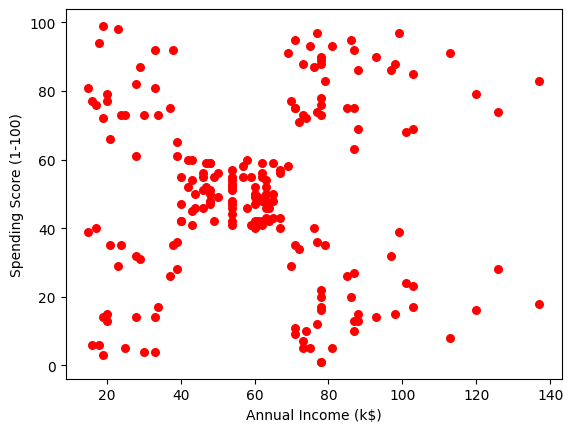

In [11]:
plt.scatter(new_data['AI'],new_data['SpC'],s = 30, c = 'r')
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')
plt.show()

**Training the KMeans model with no. of clusters as 5**


In [12]:
kmean = KMeans(n_clusters=5)
kmean.fit(new_data)

#printing all the centroids
cen = kmean.cluster_centers_
print(cen)

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Now predicting clusters of each datapoints and assigning it labels**

In [14]:
clusters = kmean.fit_predict(new_data)
df['labels'] = clusters
df.head(100)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AI,SpC,labels
0,1,Male,19,15,39,15,39,4
1,2,Male,21,15,81,15,81,0
2,3,Female,20,16,6,16,6,4
3,4,Female,23,16,77,16,77,0
4,5,Female,31,17,40,17,40,4
...,...,...,...,...,...,...,...,...
95,96,Male,24,60,52,60,52,3
96,97,Female,47,60,47,60,47,3
97,98,Female,27,60,50,60,50,3
98,99,Male,48,61,42,61,42,3


**Setting the colors for the 5 clusters**

In [15]:
clr = ['green','blue','yellow','orange','black']

**Plotting each clusters and their centroids**

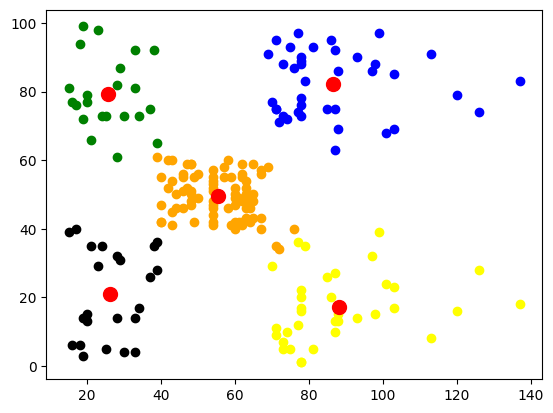

In [20]:
for i in range(5):
    a = clr[i]
    
    plt.scatter(df.AI[df.labels == i],df.SpC[df.labels == i],c = a, label ='cluster 1')
plt.scatter(cen[:,0],cen[:,1],marker = 'o',s=100, c= 'r', label = 'centroid')

**STORING THE DATA FROM NEW_DATA INTO X1**

In [21]:
x1 = new_data.loc[:,['AI','SpC']].values

# ELBOW METHOD

>   Elbow Method is a technique that we use to determine the number of centroids(k) to use in a k-means clustering algorithm.  In this method to determine the k-value we continuously iterate for k=1 to k=n (Here n is the hyperparameter that we choose as per our requirement). For every value of k, we calculate the within-cluster sum of squares (WCSS) value.
**WCSS - It is defined as the sum of square distances between the centroids and each points.**
>   Now For determining the best number of clusters(k) we plot a graph of k versus their WCSS value. Surprisingly the graph looks like an elbow (which we will see later). Also, When k=1 the WCSS has the highest value but with increasing k value WCSS value starts to decrease. We choose that value of k from where the graph starts to look like a straight line.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

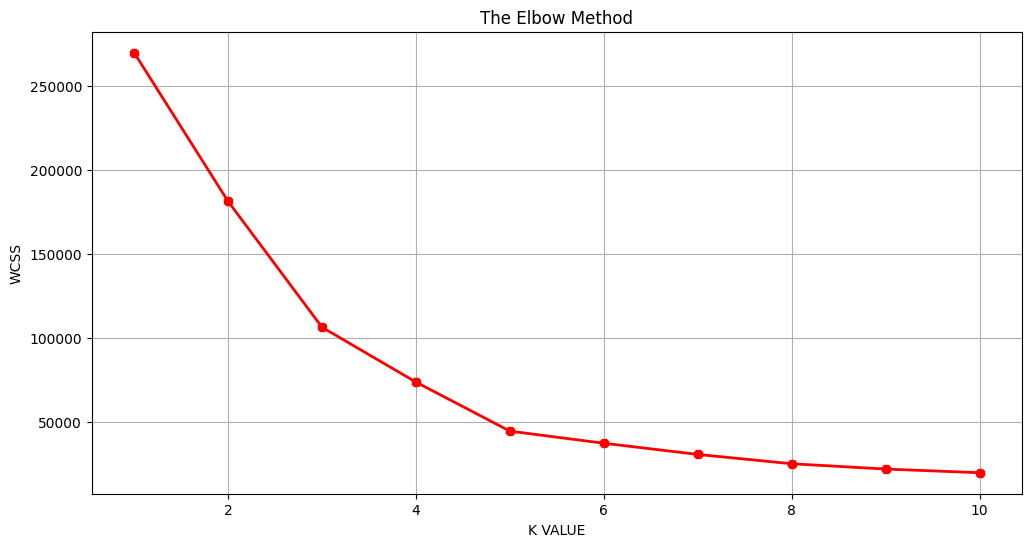

In [24]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='8')
plt.title('The Elbow Method')
plt.xlabel('K VALUE')
plt.ylabel('WCSS')
plt.show()

**As we can see the of wcss after value of k = 5 is almost similar or almost of the same range**